<a href="https://colab.research.google.com/github/ranirachel/MBKM_Ranny/blob/main/PYTN_KampusMerdeka_fp4_Rani_Rahel_Markus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Final project 4 ini menggunakan Dataset Credit card untuk tujuan Clustering. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.
Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# **IMPORT PUSTAKA**

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Library untuk data analysis dan data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib
%matplotlib inline

# Library untuk datra prepocessing
from sklearn.preprocessing import MinMaxScaler

# Library untuk hierarchical clustering
import scipy
import pylab
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import fcluster

# Library untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

# **DATA LOADING**

In [88]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MBKM_Rani/DataSet_Ass1/CreditCardGENERAL.csv")

In [89]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [90]:
df.shape

(8950, 18)

In [91]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


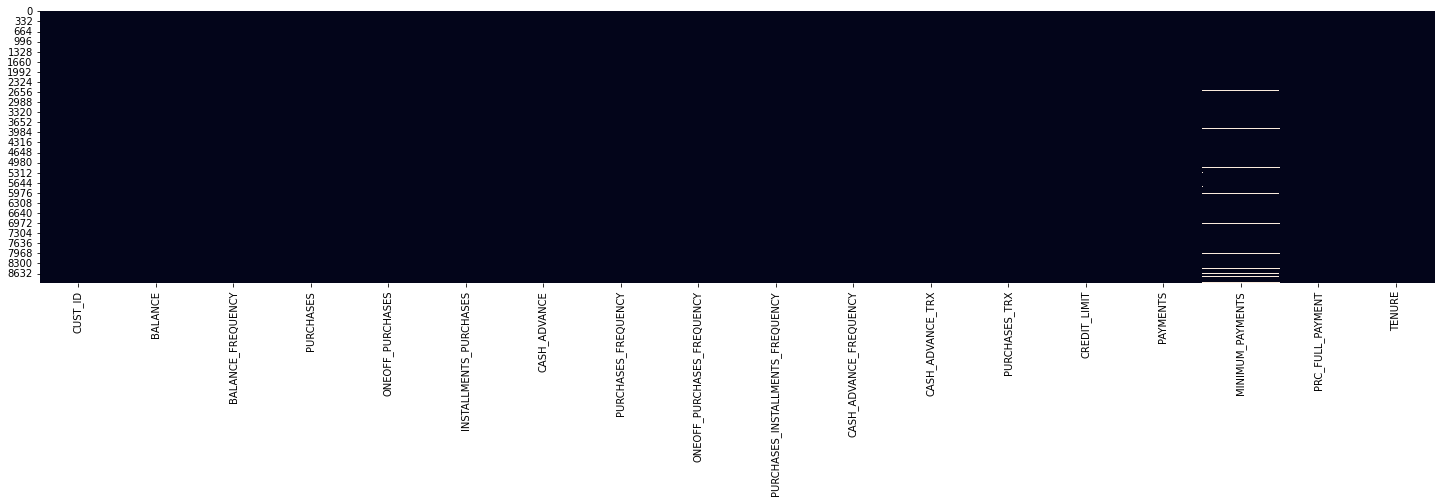

In [21]:
plt.figure(figsize=(25, 5))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# **DATA CLEANING**

In [93]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [94]:
#Menghapus data yang missing
df.dropna(inplace=True)

In [95]:
df.isnull().sum().sum()

0

In [96]:
df.shape

(8636, 18)

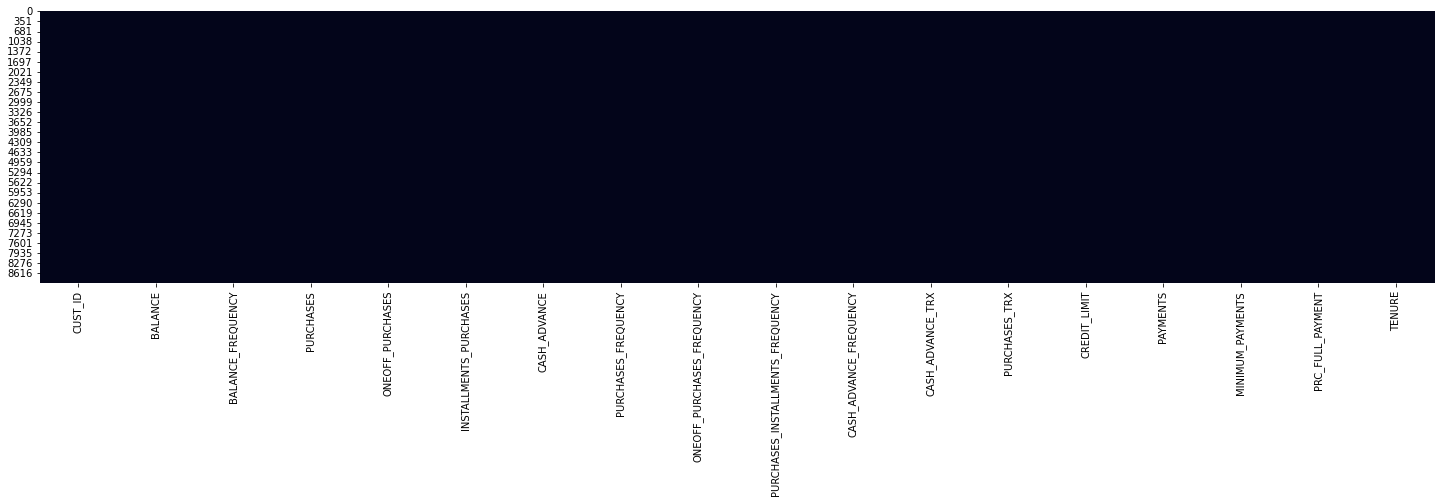

In [25]:
plt.figure(figsize=(25, 5))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [97]:
df.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Menghapus kolom data yang kemungkina tidak digunakan.

In [102]:
df.drop(['CUST_ID', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS', 'MINIMUM_PAYMENTS'], axis=1, inplace=True)

# **EXPLORASI DATA**

In [103]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.895035,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,0.159304,11.534391
std,0.207697,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,0.909091,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,0.000000,12.000000
50%,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,0.000000,12.000000
75%,1.000000,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,0.166667,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,1.000000,12.000000


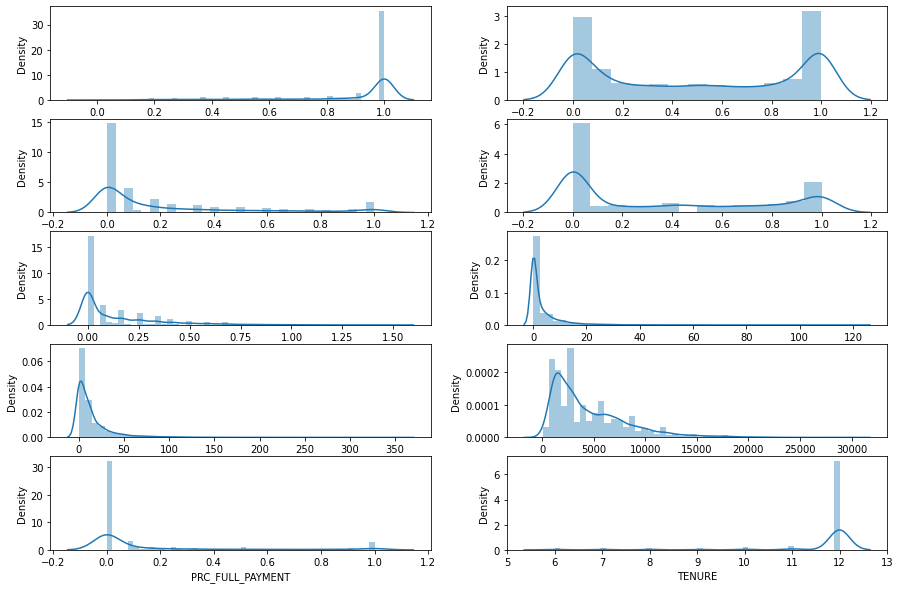

In [106]:
no_kolom = (df.columns).to_list()
plt.figure(figsize=(15,10))
for i in enumerate(no_kolom):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])

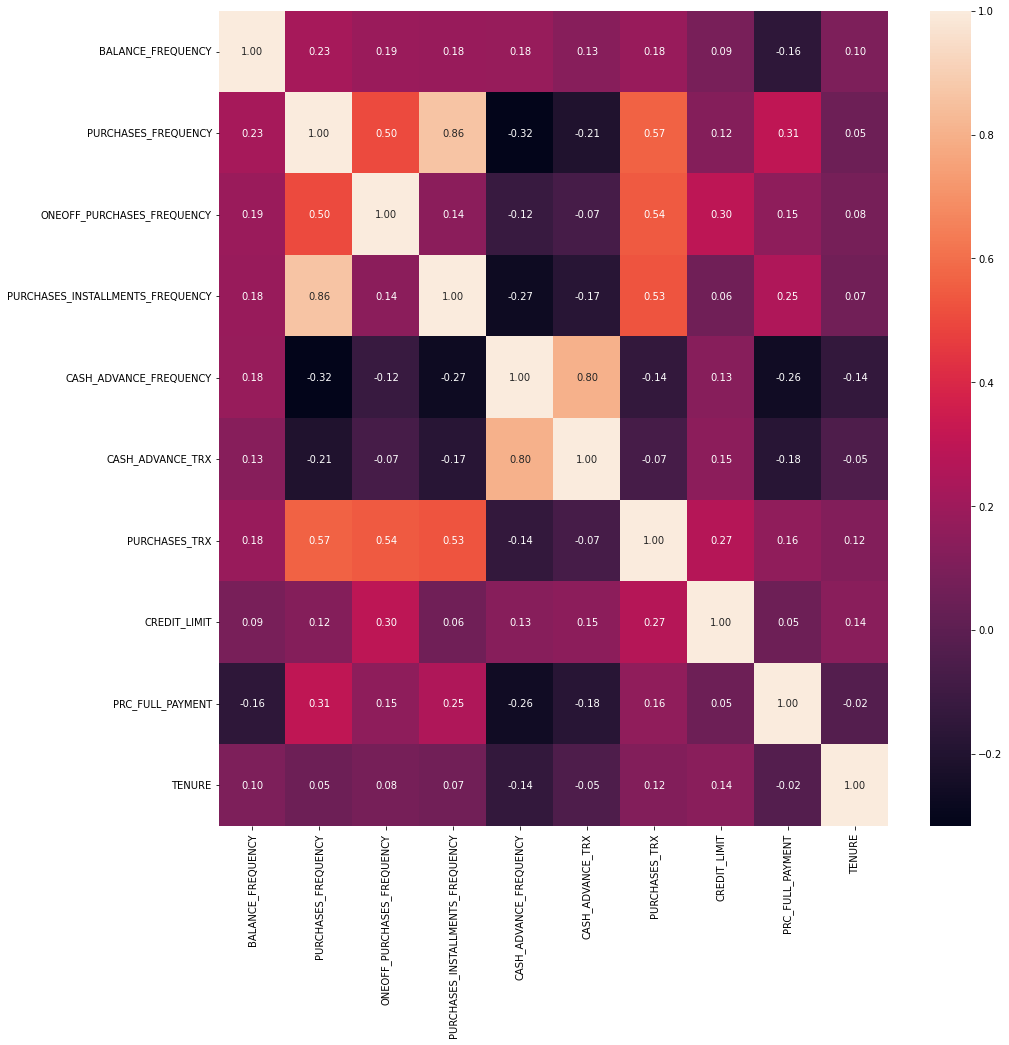

In [108]:
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

# **DATA PREPROCESSING**

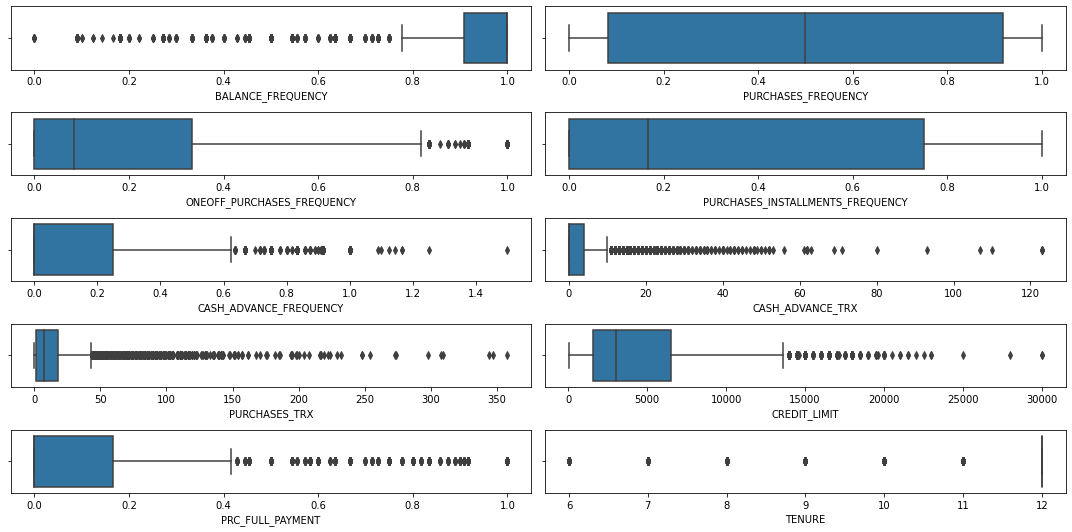

In [109]:
#Mendeteksi outliers dengan menggunakan boxplot
fig, axs = plt.subplots(5,2, figsize = (15,7.5))
plt1 = sns.boxplot(df['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(df['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(df['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(df['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(df['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(df['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt10 = sns.boxplot(df['TENURE'], ax = axs[4,1])

plt.tight_layout()

In [110]:
df2 = df.copy()
df2.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.818182,0.166667,0.000000,0.083333,0.00,0,2,1000.0,0.000000,12
1,0.909091,0.000000,0.000000,0.000000,0.25,4,0,7000.0,0.222222,12
2,1.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,0.000000,12
4,1.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,0.000000,12
5,1.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,0.000000,12


In [112]:
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

for feature in no_kolom:
  outliers(df, feature)

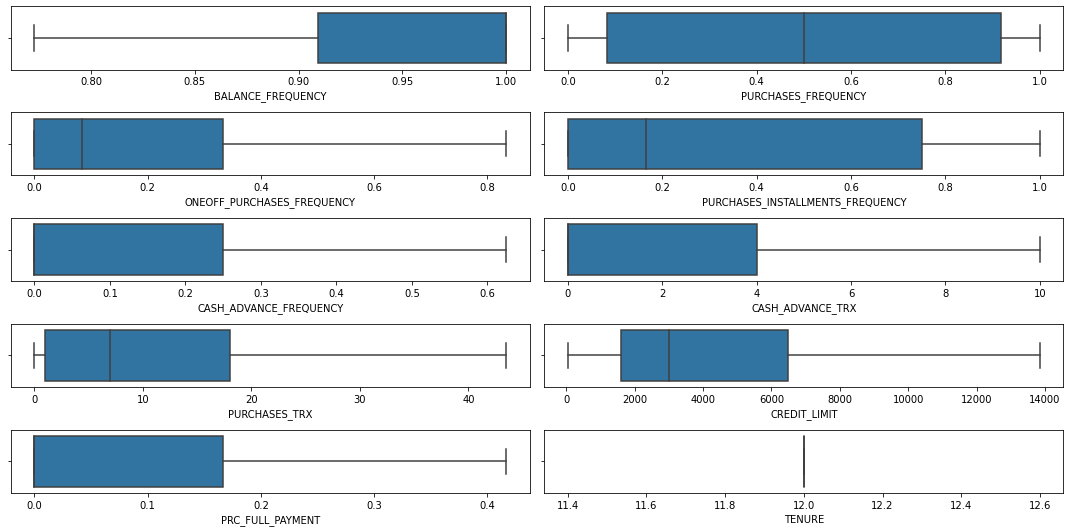

In [113]:
#Boxplot setelah penanganan outliers
fig, axs = plt.subplots(5,2, figsize = (15,7.5))
plt1 = sns.boxplot(df['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(df['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(df['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(df['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(df['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(df['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt9 = sns.boxplot(df['TENURE'], ax = axs[4,1])

plt.tight_layout()

In [114]:
#Scaling
scaling = StandardScaler()
scaling.fit(df)
scaling_df = pd.DataFrame(scaling.transform(df),columns= df.columns )
print("Semua fitur sekarang sudah diskalakan")

Semua fitur sekarang sudah diskalakan


In [115]:
#Normalisasi data
x = df.values #mengembalikan sebuah numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.2       , 0.166667  , 0.        , 0.083333  , 0.        ,
        0.        , 0.04597701, 0.06884058, 0.        , 0.        ],
       [0.6       , 0.        , 0.        , 0.        , 0.4       ,
        0.4       , 0.        , 0.50362319, 0.53333173, 0.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.27586207, 0.53985507, 0.        , 0.        ],
       [1.        , 0.083333  , 0.0999997 , 0.        , 0.        ,
        0.        , 0.02298851, 0.08333333, 0.        , 0.        ],
       [1.        , 0.666667  , 0.        , 0.583333  , 0.        ,
        0.        , 0.18390805, 0.12681159, 0.        , 0.        ]])

# **PENDEFINISIAN MODEL**

In [116]:
pca = PCA(n_components=2)
pca.fit(scaling_df)
PCA_ds = pd.DataFrame(pca.transform(scaling_df), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

,Principal Component 1,Principal Component 2
0,-1.199992,-2.035676
1,-1.769556,-0.146333
2,1.377730,0.671631
3,-1.159853,-1.183411
4,0.350776,-0.778788


In [72]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [117]:
x

array([[8.181820e-01, 1.666670e-01, 0.000000e+00, ..., 1.000000e+03,
        0.000000e+00, 1.200000e+01],
       [9.090910e-01, 0.000000e+00, 0.000000e+00, ..., 7.000000e+03,
        2.222220e-01, 1.200000e+01],
       [1.000000e+00, 1.000000e+00, 8.333325e-01, ..., 7.500000e+03,
        0.000000e+00, 1.200000e+01],
       ...,
       [8.333330e-01, 8.333330e-01, 0.000000e+00, ..., 1.000000e+03,
        2.500000e-01, 1.200000e+01],
       [8.333330e-01, 0.000000e+00, 0.000000e+00, ..., 5.000000e+02,
        2.500000e-01, 1.200000e+01],
       [7.727275e-01, 6.666670e-01, 6.666670e-01, ..., 1.200000e+03,
        0.000000e+00, 1.200000e+01]])

In [118]:
wcss = []

for i in range(1, 17):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

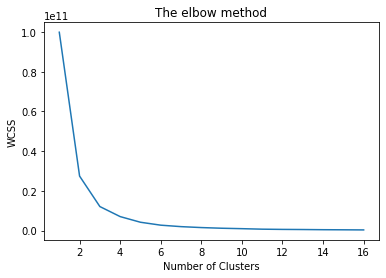

In [119]:
plt.plot(range(1,17),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel ('WCSS')
plt.show()

Berdasarkan metode elbow dari hasil grafik yang ditampilkan, jumlah kluster yang baik untuk digunakan adalah diantara 4 dan 6. namun bagusnya jika k bernilai ganjil, sehingga pada kasus ini saya mengambil k = 9.

# **PELATIHAN MODEL**

In [121]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [123]:
# Fitting data scaled dengan model K-means
kmeans.fit(x)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 10)

artinya 5 kluster pada 10 atribut

# **EVALUASI MODEL**

In [124]:
# Mencari nilai rata-rata setiap cluster
cls_avg = pd.DataFrame(data = kmeans.cluster_centers_, columns = [scaling_df.columns])
cls_avg

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.939330,0.452462,0.113928,0.349798,0.103659,1.793640,8.459235,1378.107803,0.090586,12.0
1,0.952645,0.539973,0.262946,0.388213,0.147520,2.766313,15.019241,6202.530041,0.111603,12.0
2,0.962797,0.533443,0.294876,0.371165,0.183136,3.432852,15.655938,9247.008375,0.085736,12.0
3,0.964439,0.617455,0.363359,0.456961,0.171639,3.193487,20.078544,13003.448276,0.115834,12.0
4,0.935891,0.476811,0.171726,0.357999,0.126236,2.393669,11.208604,3277.922303,0.105462,12.0


In [125]:
# Lakukan invers pada data yang telah di standarisasi untuk memahami karakter dari data dan setiap kolom
cls_avg_invers = scaling.inverse_transform(cls_avg)
cls_avg_invers = pd.DataFrame(data = cls_avg,columns = [scaling_df.columns])
cls_avg_invers

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.939330,0.452462,0.113928,0.349798,0.103659,1.793640,8.459235,1378.107803,0.090586,12.0
1,0.952645,0.539973,0.262946,0.388213,0.147520,2.766313,15.019241,6202.530041,0.111603,12.0
2,0.962797,0.533443,0.294876,0.371165,0.183136,3.432852,15.655938,9247.008375,0.085736,12.0
3,0.964439,0.617455,0.363359,0.456961,0.171639,3.193487,20.078544,13003.448276,0.115834,12.0
4,0.935891,0.476811,0.171726,0.357999,0.126236,2.393669,11.208604,3277.922303,0.105462,12.0


In [126]:
# Menambahkan kolom cluster pada dataframe
df_clusters = pd.concat([scaling_df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.39949,-0.820769,-0.713286,-0.717179,-0.721139,-0.704336,-0.738740,-1.013101,-0.629480,0.0,0
1,-0.39690,-1.236139,-0.713286,-0.926522,0.648726,0.458694,-0.885624,0.751136,0.766378,0.0,1
2,0.60569,1.256077,2.330056,-0.926522,-0.721139,-0.704336,-0.004320,0.898156,-0.629480,0.0,1
3,0.60569,-1.028455,-0.408952,-0.926522,-0.721139,-0.704336,-0.812182,-0.954293,-0.629480,0.0,0
4,0.60569,0.425339,-0.713286,0.538882,-0.721139,-0.704336,-0.298088,-0.777870,-0.629480,0.0,0


Pengujian setiap cluster

## Cluster 0

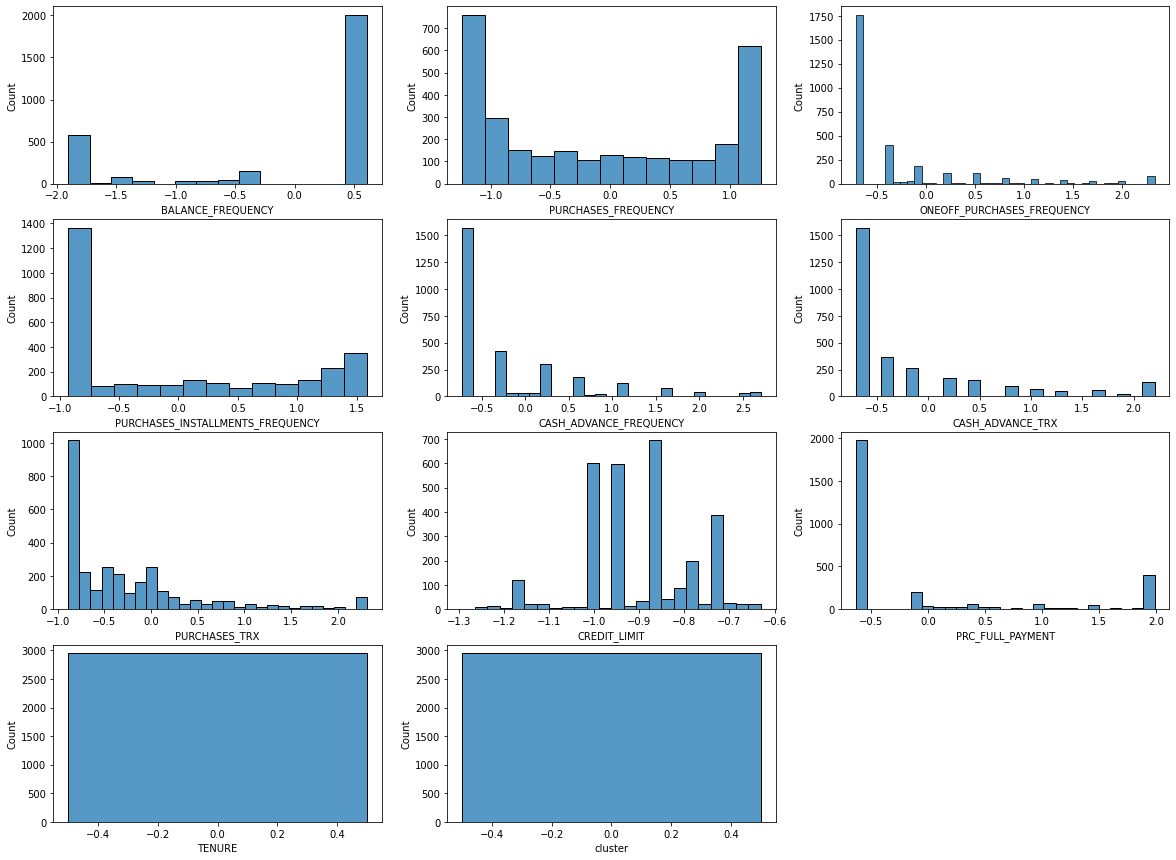

In [127]:
df_clusters0 = df_clusters[(df_clusters['cluster'] == 0)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters0):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters0[i[1]])

## Cluster 1

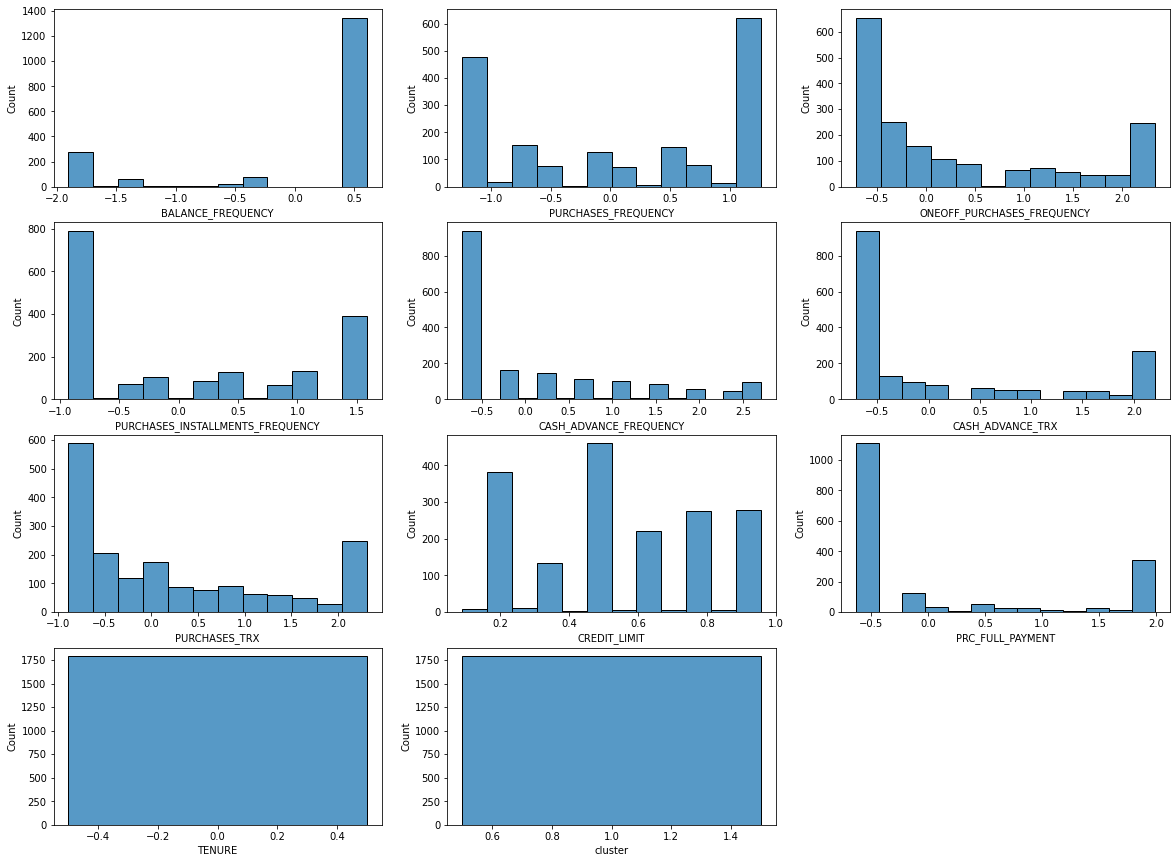

In [128]:
df_clusters1 = df_clusters[(df_clusters['cluster'] == 1)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters1):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters1[i[1]])

## Cluster 2

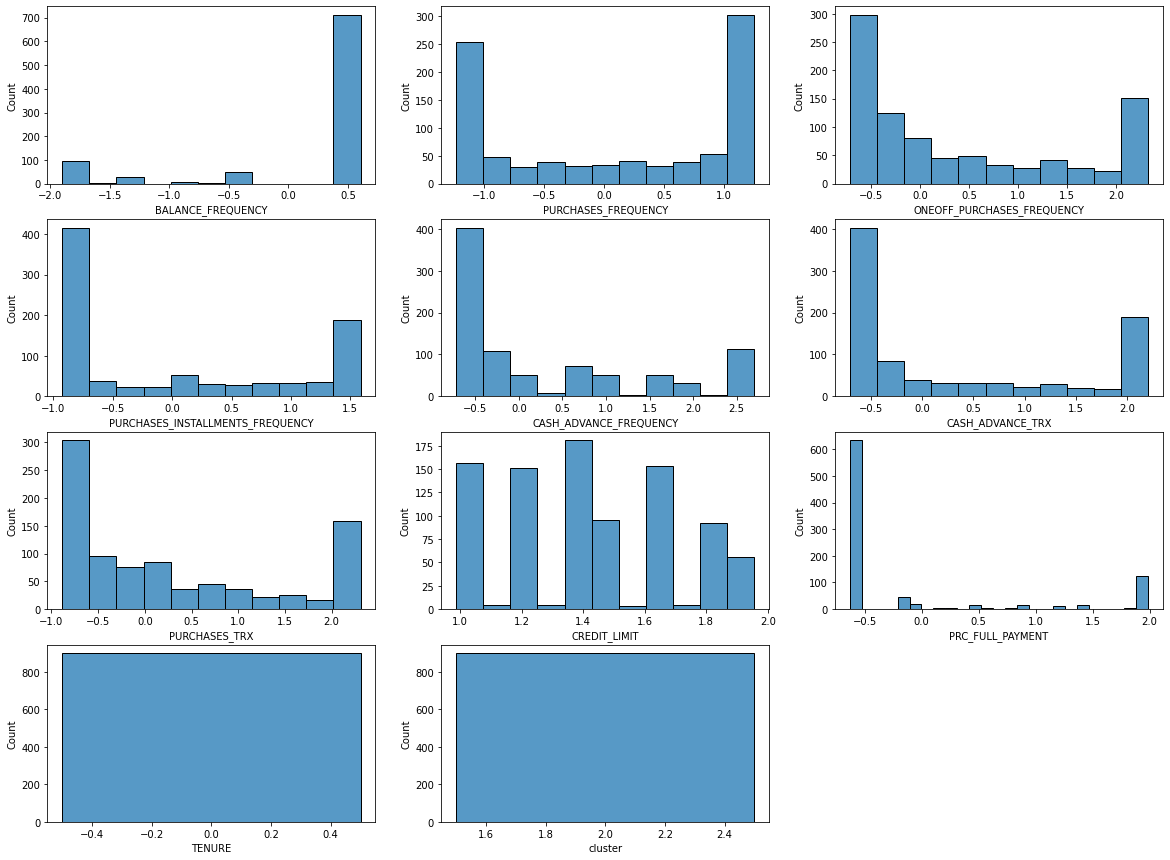

In [129]:
df_clusters2 = df_clusters[(df_clusters['cluster'] == 2)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters2):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters2[i[1]])

## Cluster 3

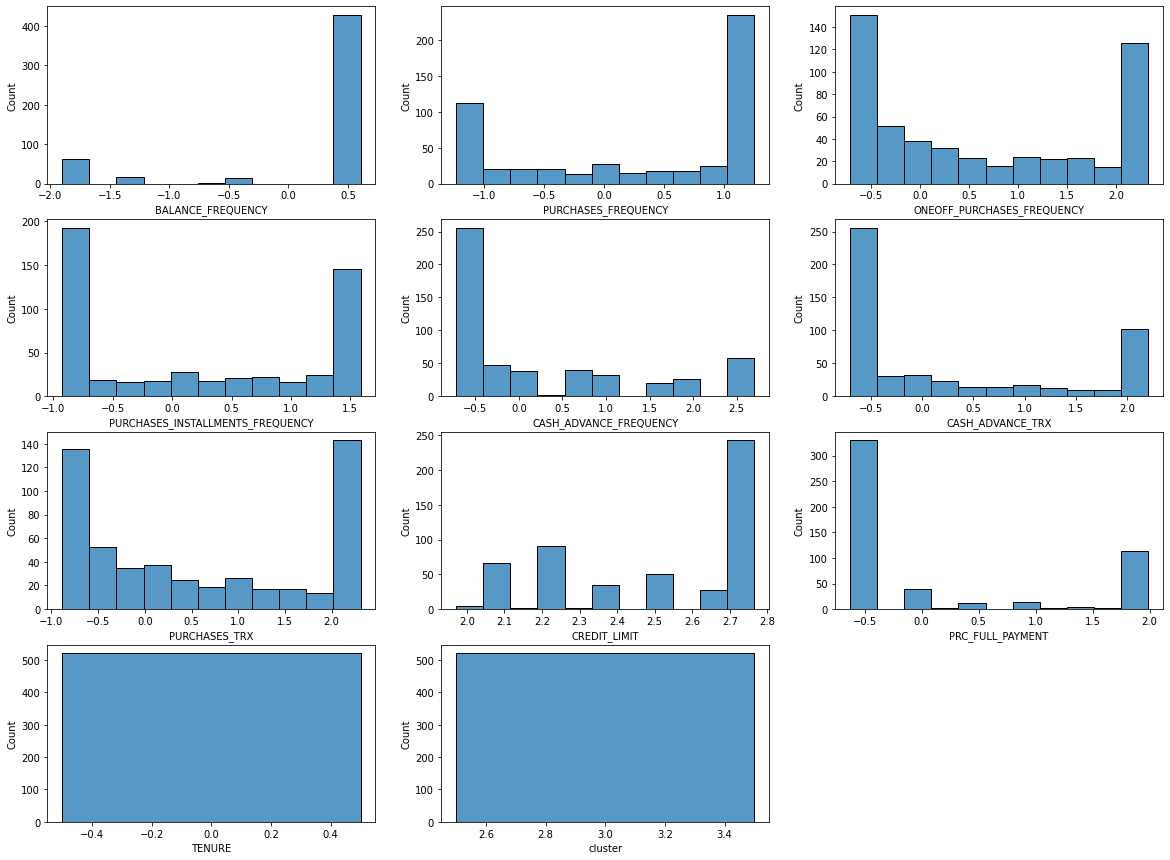

In [130]:
df_clusters3 = df_clusters[(df_clusters['cluster'] == 3)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters3):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters3[i[1]])

## Cluster 4

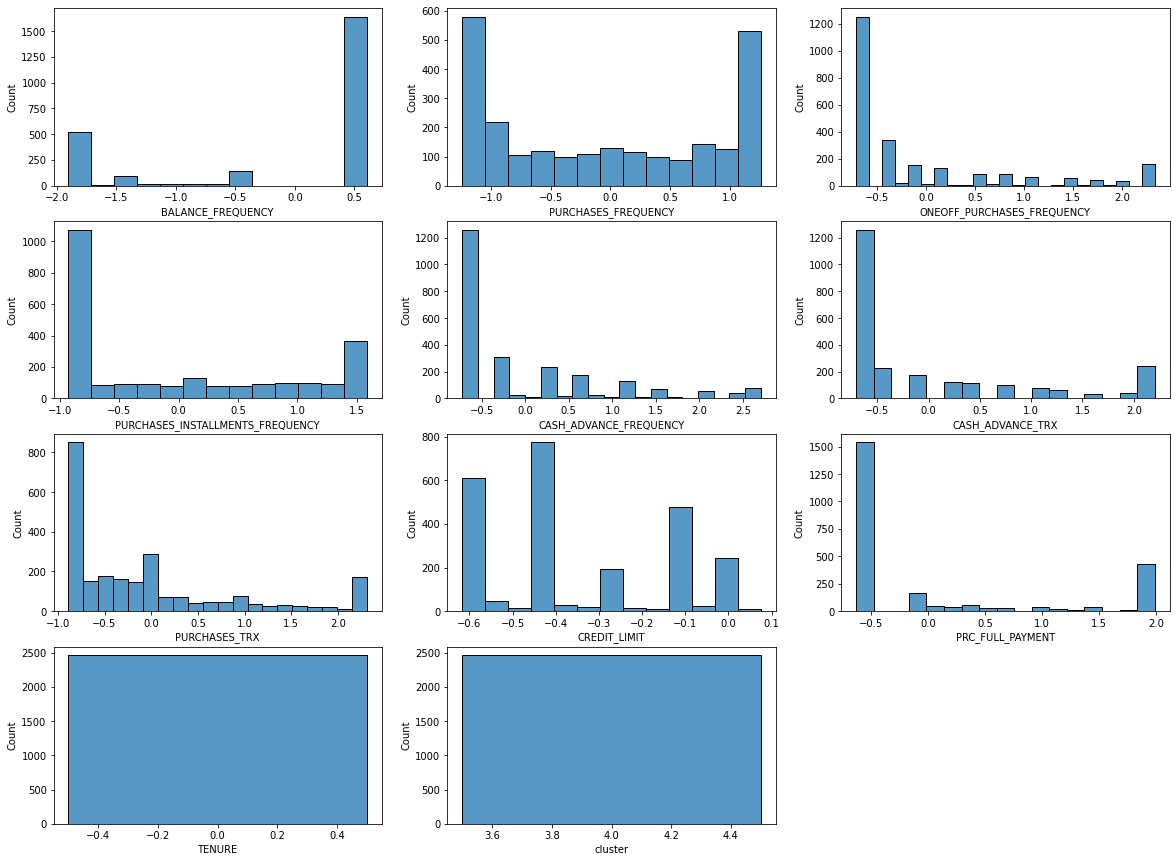

In [131]:
df_clusters4 = df_clusters[(df_clusters['cluster'] == 4)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters4):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters4[i[1]])

In [132]:
# Jumlah setiap cluster
cluster_count = df_clusters['cluster'].value_counts().sort_values(ascending=False)
cluster_count

0    2956
4    2464
1    1793
2     901
3     522
Name: cluster, dtype: int64

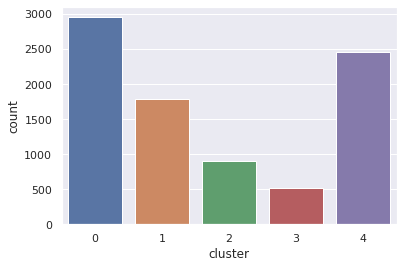

In [133]:
sns.set_theme(style="darkgrid")
sns.countplot(x="cluster", data=df_clusters)

In [134]:
# Menambahkan kolom klaster dengan mengambil data dari labels

PCA_ds['Cluster'] = labels
PCA_ds.head()

,Principal Component 1,Principal Component 2,Cluster
0,-1.199992,-2.035676,0
1,-1.769556,-0.146333,1
2,1.377730,0.671631,1
3,-1.159853,-1.183411,0
4,0.350776,-0.778788,0


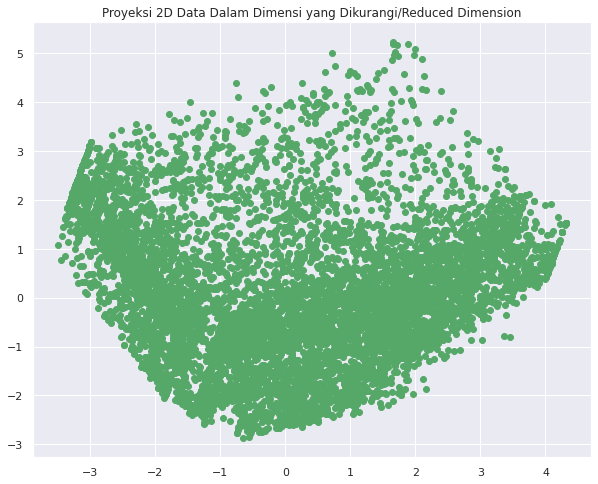

In [135]:
# Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x = PCA_ds["Principal Component 1"]
y = PCA_ds["Principal Component 2"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c='g' , marker="o" )
ax.set_title("Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

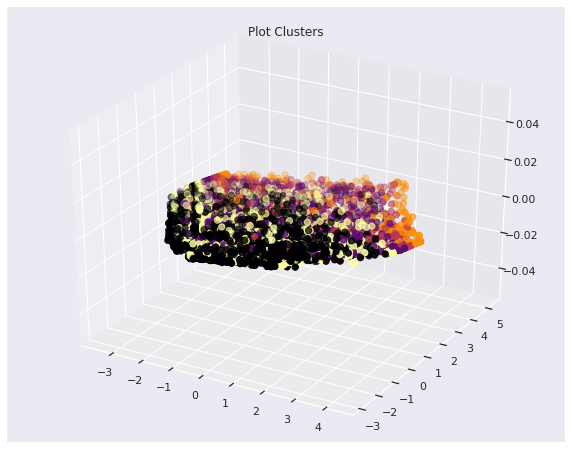

In [136]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Cluster"], marker='o', cmap = 'inferno')
ax.set_title("Plot Clusters")
plt.show()

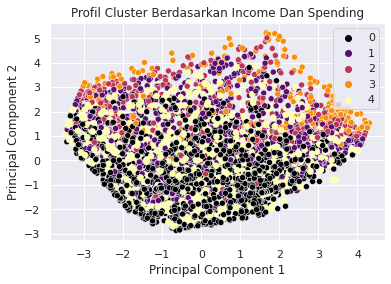

In [137]:
pl = sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = "Cluster", data = PCA_ds, palette='inferno')
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

# **MODEL INFERENCE**

In [138]:
df_clusters.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.39949,-0.820769,-0.713286,-0.717179,-0.721139,-0.704336,-0.738740,-1.013101,-0.629480,0.0,0
1,-0.39690,-1.236139,-0.713286,-0.926522,0.648726,0.458694,-0.885624,0.751136,0.766378,0.0,1
2,0.60569,1.256077,2.330056,-0.926522,-0.721139,-0.704336,-0.004320,0.898156,-0.629480,0.0,1
3,0.60569,-1.028455,-0.408952,-0.926522,-0.721139,-0.704336,-0.812182,-0.954293,-0.629480,0.0,0
4,0.60569,0.425339,-0.713286,0.538882,-0.721139,-0.704336,-0.298088,-0.777870,-0.629480,0.0,0


In [139]:
col_clus = df_clusters['cluster']
cc = pd.DataFrame(data=col_clus)
cc.head()

,cluster
0,0
1,1
2,1
3,0
4,0


In [140]:
df['Cluster'] = cc
df

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,0.000000,12,0.0
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,0.222222,12,1.0
2,1.000000,1.000000,0.833333,0.000000,0.000000,0,12.0,7500.0,0.000000,12,1.0
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,0.000000,12,0.0
5,1.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,1800.0,0.000000,12,3.0
...,...,...,...,...,...,...,...,...,...,...,...
8943,0.772728,0.166667,0.166667,0.000000,0.000000,0,1.0,500.0,0.000000,12,NaN
8945,1.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,0.416668,12,NaN
8947,0.833333,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,0.250000,12,NaN
8948,0.833333,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,0.250000,12,NaN


In [141]:
df.shape

(8636, 11)

# **PENGAMBILAN KEPUTUSAN**